# 3D Geo Visualisation

In [12]:
import pandas as pd
import numpy as np
from summarytools import dfSummary
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [6]:
# Import Data

df = pd.read_csv("Bevoelkerung.csv")
dfSummary(df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Breite[int64],Mean (sd) : 17.4 (1.3)min < med < max:15.0 < 18.0 < 19.0IQR (CV) : 1.0 (13.1),5 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtElEQVR4nO3bUYraUACF4XuLiL4kiOBiXEQX20W4GynxoTMUNH0uHSZqEzInft+z0XvhR8jDqX3fF/jqvs19ALjHau4DMK5a67aUsn7y8d9937+NeZ6xCHVBaq3b/X7/vWma3TPPXy6Xn7XWH18xVqEuy7ppmt3xeHxr2/b9kQe7rtucTqfd+Xxel1KEyvTatn0/HA6/nnh0O/phRuJlighCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJYDM1gaVOlodMeW+hjmzJk+XPTH1voY5vsZPlAZPeW6gTWeJk+R5T3dvLFBGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKhMEpypyLylddc/KvT0Odc1H5qmtOPjb0jzrnovJV15x84K4V6pyLylddc/I3L1NEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhHumqJ0Xbd59Iu7rttcr9dVKaWptT58sFJKc7vdVjP99v+Y89yxvz30mT9ta8f89RC1cwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Laenge[int64],Mean (sd) : 64.3 (3.5)min < med < max:59.0 < 64.0 < 69.0IQR (CV) : 4.0 (18.6),8 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACWElEQVR4nO3cvY7aQBSG4TP8rMyPbCEU6GhSRkpByUXkYnMJKbgCijSp6JAQMsJZCzN2mqRbAR5DvJ/2ffqDZuxXSG6Oq6rKgPeu0/YBgHv02j7Ae+WcG5jZS+D4uaqq10eeR8EznxmhvsE5N5hOp9/iOJ6EzB+Px4Nz7vtHivXZz4xQ3/YSx/FktVq9JkmS1xlM0zRar9eT/X7/YmYfJlR78jMj1CuSJMlns9nvgNHBww8j4lnPjI8pSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSLi5drLhFuGOmZWBs2aim5u9930zi51zIeON7tzi+4rLsuwHzt50NdQmW4S99/0syz6Px+NfnU6nCDmc4ubmLMv6RVF8XSwW3W63W2uhrVmzO7f5voqiiLz3X/I8/2FmIftRr7r1jxq8RXi73U42m82n5XL5cz6fH+oeTHVz8/l87kVRNFwul3ndez/gzq29r7/zw8vl0q07e4+7Nk6HbBE+HA4DM7PRaBS6gdhMeHNzg3s3vnMb7+vf/LPwMQUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJd23zS9M0qvvDp9MpMjPLsiza7XbDuvNpmkbe+56FL8RtIi7Lsve/7/2AO7dy7qbz95z3D1bcDZZlTGfJAAAAAElFTkSuQmCC"">",0(0.0%)
3,Bevoelkerung[int64],Mean (sd) : 4544.4 (4118.3)min < med < max:500.0 < 4000.0 < 12000.0IQR (CV) : 4300.0 (1.1),9 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACOUlEQVR4nO3cv4riUBiG8e/EP8RREkRWO5vtt0jpRezFzkV4BRbTTGUnSIiYHVFitttmB2POmcG88vxqzyEeHpTAx3F1XRvQddGjHwC4R7/pA865kZkNPfc/13X94bkW+OdmqM650Ww2+50kydRn88PhkDvnXokVoZp+UYdJkkxXq9VHmqanNhsXRRGv1+vpfr8fmhmhIkjjX7+ZWZqmp/l8/sdj/5HHGuA/vExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCwl3XTioKvCnbjNuyO+UpQw29KduM27K75ilDtYCbss24LbuLnjVUMwu6KduM27I7hZcpSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSHjqoZQQVVUNzCxxzvksl5xl/YIZ3sjMrp5rb54ZoX6iLMvB5XL5tVwue71er/WYoOIsa+gMb1VVg7Isf04mk/coii5t1zedGaF+4nw+9+M4fsmy7LRYLPI2a4VnWYNmeLfb7XSz2fzIsuztO86MUG8Yj8e+86yys6y+M7x5no/Mvu/MeJmCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFhLump4qiiNtuXBRFXFVV3/yHj0Mk1+u17/PcZmbH4zE2MyvLMt7tdi9t1j74e4d46Jk1feYvFRTHOLF6yMkAAAAASUVORK5CYII="">",0(0.0%)


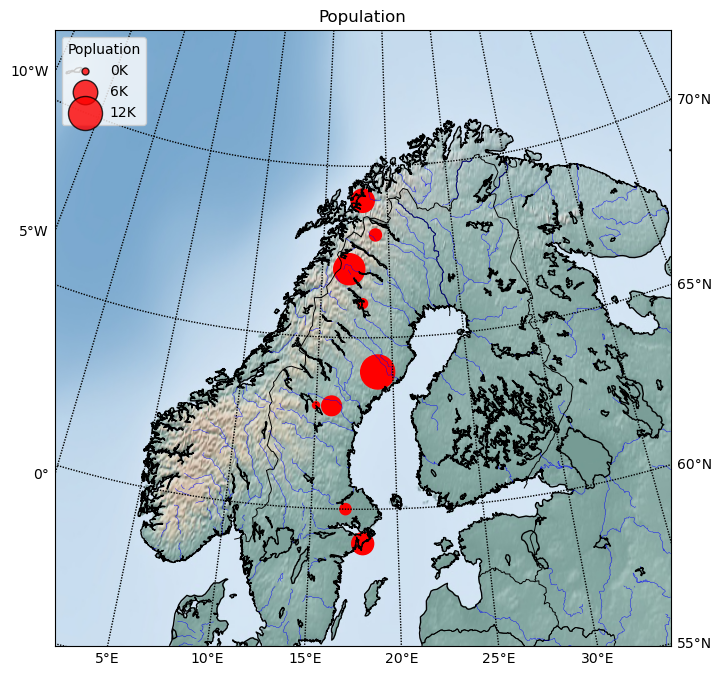

In [35]:
# Geo Visualization with Geo data

# Extract Data
lat = df["Laenge"].values
lon = df["Breite"].values
population = df["Bevoelkerung"].values
scale_factor = 0.05


#Basemap
fig = plt.figure(figsize=(8,8))
m = Basemap(projection="lcc", resolution="i",width=2E6, height=2E6, lat_0=65, lon_0=18) 
m.drawcoastlines()
m.drawcountries(linewidth=0.7, color="k")
m.drawrivers(linewidth=0.3, color="b")
m.shadedrelief()

parallels = np.arange(-90.,90,5.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(0.,360.,5.)
m.drawmeridians(meridians,labels=[True,False,False,True])

# Population data
m.scatter(lon, lat, latlon=True, s=population*scale_factor, c="r")

# Legend
legend_sizes = np.linspace(population.min(), population.max(), num=3)
legend_labels = [f"{int(p/1000000)}M" if p >= 1000000 else f"{int(p/1000)}K" for p in legend_sizes]

for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], s=size * scale_factor, c="r", alpha=0.8, edgecolors="k", label=label)

plt.legend(title="Popluation", loc="upper left", fontsize=10)
plt.title("Population")

plt.show()